In [145]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Read Data
attData = pd.read_csv('Attrition.csv')

#Size of the Dataset
print("Size of Dataset: \n{0}\n".format(attData.shape))

attData = attData.replace('NAN', np.NaN)

print("Count of NaN/Null values for each feature: \n{0}\n".format(attData.isna().sum()))

Size of Dataset: 
(1470, 33)

Count of NaN/Null values for each feature: 
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            5
Education                   1
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  5
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               5
MonthlyRate                 5
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole        

In [146]:
#Cleaning the missing values in the dataset
columnsList = []
categCols = []
for column in attData:
    columnsList.append(column)
    if len(attData[column].unique()) <= 6:
        categCols.append(column)
    try:
        if(int(attData[column].iat[0])):
            if abs(attData[column].skew() - 0) < 1e-1:
                attData[column].fillna(int(attData[column].astype(float).mean(skipna=True)), inplace=True)
            else:
                attData[column].fillna(int(attData[column].astype(float).median(skipna=True)), inplace=True)
    except:
        continue

print(attData.isna().sum())

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [147]:
#Character or Numerical Data
print("Categorical Data: \n{0}\n".format(categCols))
numCols = list(set(columnsList) - set(categCols))
print("Numerical Data: \n{0}".format(numCols))


Categorical Data: 
['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

Numerical Data: 
['JobRole', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkingYears', 'DistanceFromHome', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'MonthlyRate', 'YearsInCurrentRole', 'YearsAtCompany', 'DailyRate', 'EmployeeNumber', 'MonthlyIncome', 'HourlyRate', 'Age', 'PercentSalaryHike']


In [148]:
# #Outlier Detection
# # IQR
# for column in attData[numCols]:
#     print(column)
#     Q1 = np.percentile(attData[column], 25, interpolation = 'midpoint')
#     Q3 = np.percentile(attData[column], 75, interpolation = 'midpoint')
#     IQR = Q3 - Q1

#     # Upper bound
#     upper = np.where(attData[column] >= (Q3+1.5*IQR))
#     # Lower bound
#     lower = np.where(attData[column] <= (Q1-1.5*IQR))
#     print(upper)        
#     #Removing the Outliers
#     attData.drop(upper[0], inplace = True)
#     attData.drop(lower[0], inplace = True)

# print("New Shape: ", attData.head(10))

<AxesSubplot:ylabel='Attrition'>

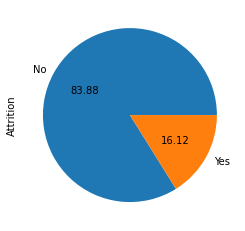

In [149]:
#Balanced or imbalanced Dataset
# attCount = attData['Attrition'].value_counts().reset_index()
# sns.barplot(x = "index", y = "Attrition", data = attCount, palette = "cividis");

attData['Attrition'].value_counts().plot.pie(autopct='%.2f')

In [150]:
#Distribution Of Data
attData.describe()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,1024.865306,2.721769,2.729932,2.063946,2.728571,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,602.024335,1.093082,0.711561,1.106940,1.102846,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,491.250000,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [151]:
#Feature Removal
attData = attData.drop('Over18', axis = 1) #Contains only the value 'Yes'
attData = attData.drop('EmployeeNumber', axis = 1) # A number assignment 
print(attData.head(10))

  Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

  DistanceFromHome Education EducationField  EnvironmentSatisfaction  Gender  \
0                1         2  Life Sciences                        2  Female   
1                8       

In [152]:
#Feature Selection - Filter Method(Removing Higher Correlated features)

corr = attData.corr()

#Visualizing correlation
# plt.figure(figsize=(16,16))
# sns.heatmap(corr, annot = True, fmt = '.0%')

In [153]:
# # Create correlation matrix
# corr_matrix = corr.abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# # Get features with correlation greater than 0.75
# to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# print('Features removed since correlation is higher:\n', to_drop)

# # Drop features 
# attData = attData.drop(to_drop, axis=1, inplace=True)

In [154]:
#Transform the data
#Transform non numerical into numerical

from sklearn.preprocessing import LabelEncoder

for column in attData.columns:
    if attData[column].dtype == 'int64':
        continue
    attData[column] = LabelEncoder().fit_transform(attData[column].astype(str))

attData

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,0,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,27,0,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,11,1,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,22,3,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,11,0,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,884,1,15,1,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,2,613,1,25,0,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,2,155,1,23,2,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,1,1023,2,11,2,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [155]:
# #Split the Columns
# XColumn = attData.iloc[:, 1:attData.shape[1]]
# YColumn = attData.iloc[:, 0]

# from skfeature.function.similarity_based import fisher_score

# #calculating scores
# ranks = fisher_score.fisher_score(XColumn, YColumn)

# #plotting the ranks
# feat_importances = pd.Series(ranks, attData.columns[0:len(attData.columns)-1])
# feat_importances.plot(kind='barh', color = 'teal')
# plt.show()

In [156]:
# # Wrapper method
# import statsmodels.api as sm
# #Backward Elimination
# cols = list(XColumn.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = XColumn[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(YColumn.astype(float),X_1.astype(float)).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>1):
#         cols.remove(feature_with_p_max)
#     else:
#         break
        
# selected_features_BE = cols
# # Drop features 
# attdata = attData.drop(list(set(attData) - set(selected_features_BE)), axis=1, inplace=True)
# print(attData.head(10))

In [157]:
X = attData.iloc[:, 1:attData.shape[1]]
Y = attData.iloc[:, 0]
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [158]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
#Standardization or z-score normalization
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#how much information (variance) can be attributed to each of the principal components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.1384348  0.06516575 0.06054666 0.05444332 0.05147202 0.04079826
 0.03930502 0.03784552 0.03732929 0.03527764 0.03451816 0.03397145
 0.03292086 0.03229576 0.03143293 0.03047957 0.03003998 0.0298584
 0.02907756 0.02790925 0.02651214 0.02256787 0.01603451 0.01438312]


In [160]:
#Handling the Dataset Imbalance 
from imblearn.combine import SMOTETomek
from collections import Counter

counter = Counter(Y_train)
print('Before',counter)

#oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, Y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 988, 1: 188})
After Counter({0: 988, 1: 988})


In [161]:
#Train the Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomforest.fit(X_train_smtom, y_train_smtom)

#Get the accuracy on the training data
randomforest.score(X_train_smtom, y_train_smtom)

0.9964574898785425

In [162]:
importances = randomforest.feature_importances_
important_features_dict = {}
for idx, val in enumerate(importances):
    important_features_dict[idx] = val
    
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)[1:]

important_features = attData.columns[important_features_list]

feat_importances = pd.Series(importances[important_features_list], index=important_features)
feat_importances.nlargest(6).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 6 Features With Higher Random Forest Feature Importance')
plt.show()
# for feature in zip(attData.columns, randomforest.feature_importances_):
#     print(feature)

AttributeError: 'NoneType' object has no attribute 'columns'

In [163]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg, 25)
# rfe = rfe.fit(X_train_smtom, y_train_smtom.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [164]:
logreg = LogisticRegression()
logreg.fit(X_train_smtom, y_train_smtom)

NameError: name 'LogisticRegression' is not defined

In [165]:
#Predict the response for test dataset
y_log_pred = logreg.predict(X_test)

cm = confusion_matrix(Y_test, y_log_pred)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print("Confusion Matrix:\n", cm)

#print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

print("\nAccuracy of logistic regression classifier on test set:\n{:.2f}".format(accuracy_score(Y_test, y_log_pred)))

print("\nClassification Report:\n")
print(classification_report(Y_test, y_log_pred))

NameError: name 'logreg' is not defined

In [166]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_smtom,y_train_smtom)


In [167]:
#Predict the response for test dataset
y_clf_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, y_clf_pred)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print("Confusion Matrix:\n", cm)

print("\nAccuracy score:\n{:.2f}".format(accuracy_score(Y_test, y_clf_pred)))
# print("Precision score: {}".format(precision_score(Y_test, rf_predictions)))
# print("Recall score: {}".format(recall_score(Y_test, rf_predictions)))
# print("F1 score: {}".format(f1_score(Y_test, rf_predictions)))
print("\nClassification Report:\n")
print(classification_report(Y_test, y_clf_pred))

Confusion Matrix:
 [[192  53]
 [ 29  20]]

Accuracy score:
0.72

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       245
           1       0.27      0.41      0.33        49

    accuracy                           0.72       294
   macro avg       0.57      0.60      0.58       294
weighted avg       0.77      0.72      0.74       294



In [168]:
attData2 = attData

In [ ]:
X = attData2.iloc[:, 1:attData.shape[1]]
Y = attData2.iloc[:, 0]
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=26,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, Y)
list_features = list(sbs.k_feature_names_)
# Drop features 
# attdata = attData.drop(list(set(attData) - set(attData[list_features])), axis=1, inplace=True)
# print(attData.head(10))